<a href="https://colab.research.google.com/github/Neena-A/Wat-Pneu/blob/main/C_Decryption_Done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2023-04-18 at 1.43.58 PM.jpeg.crdownload to WhatsApp Image 2023-04-18 at 1.43.58 PM.jpeg.crdownload


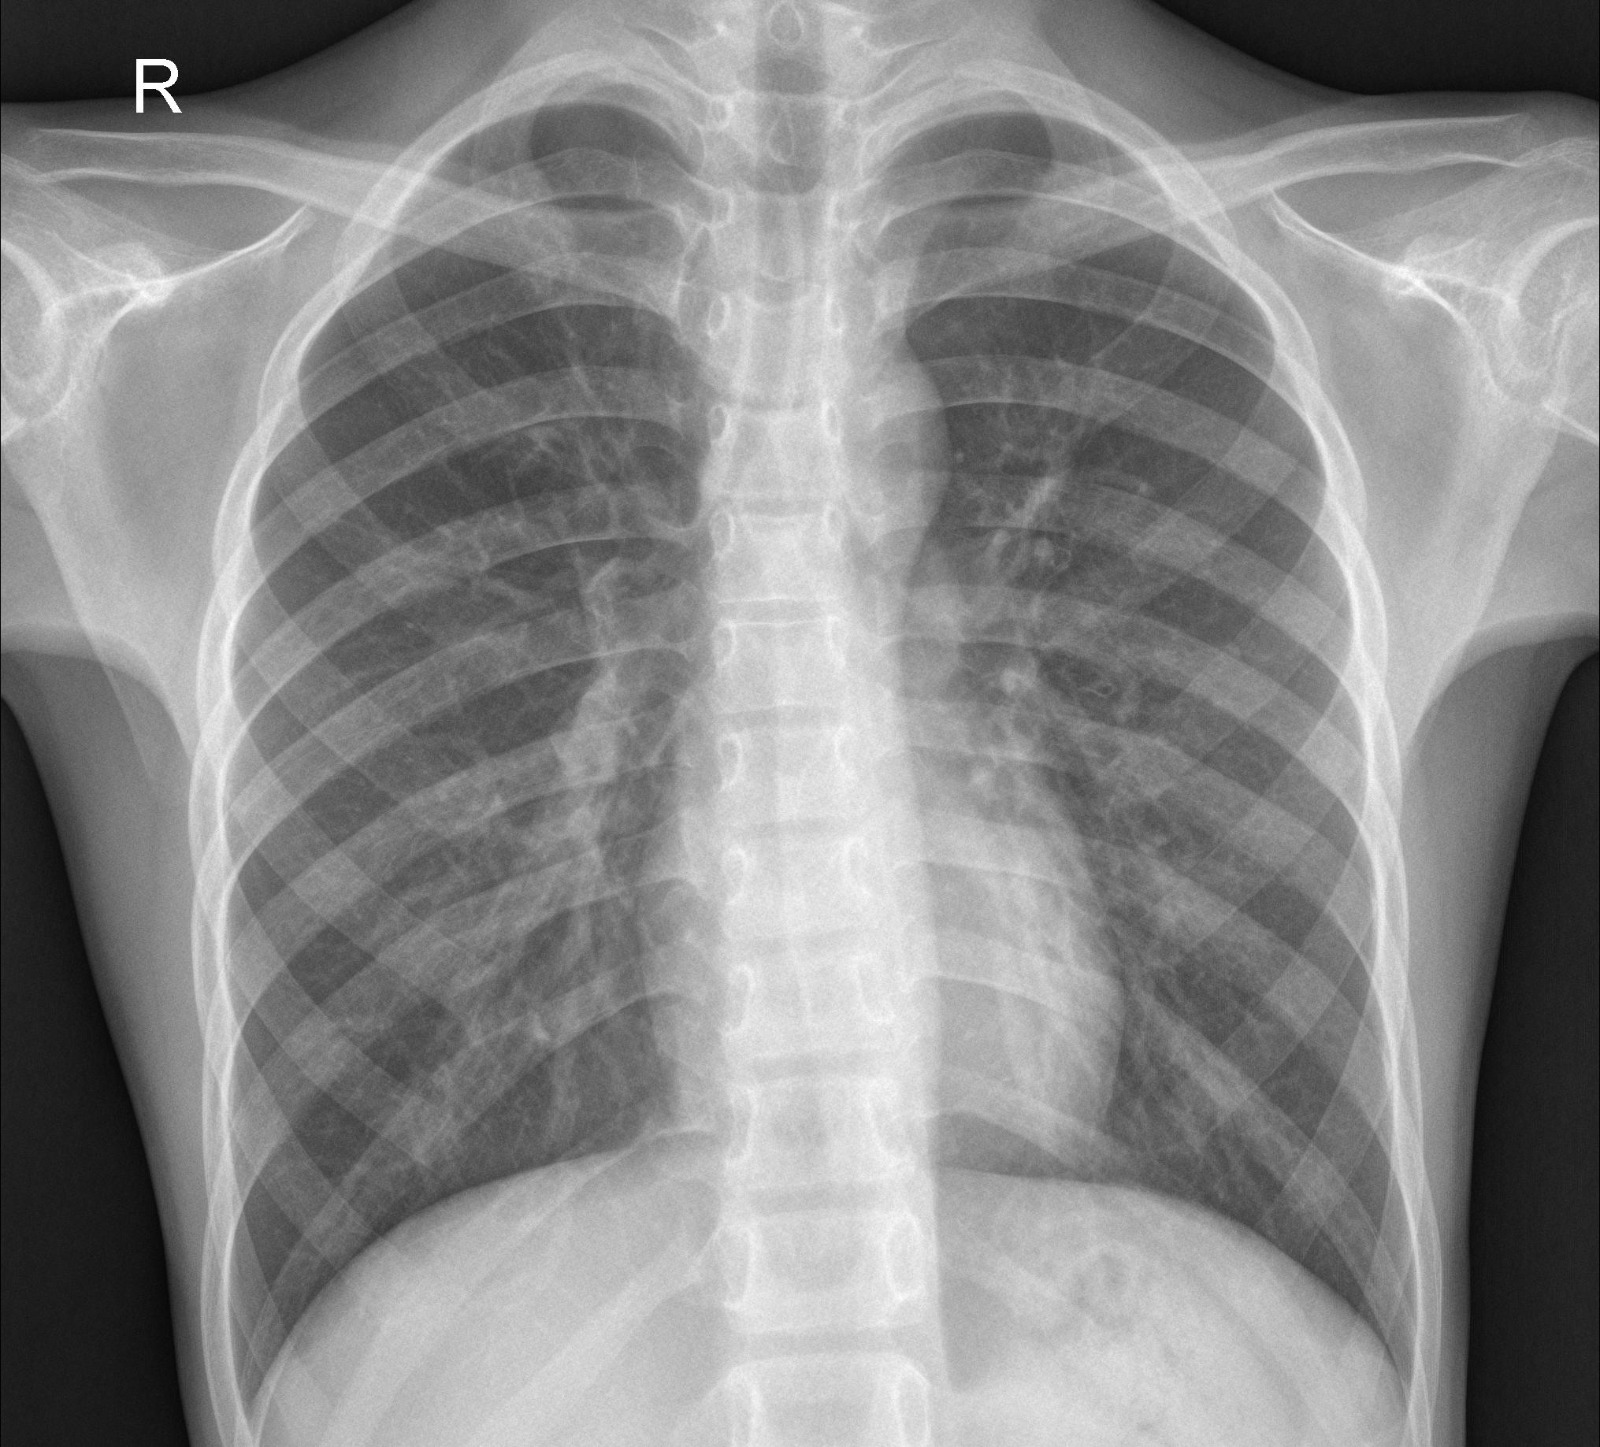

(1000, 1000, 3)


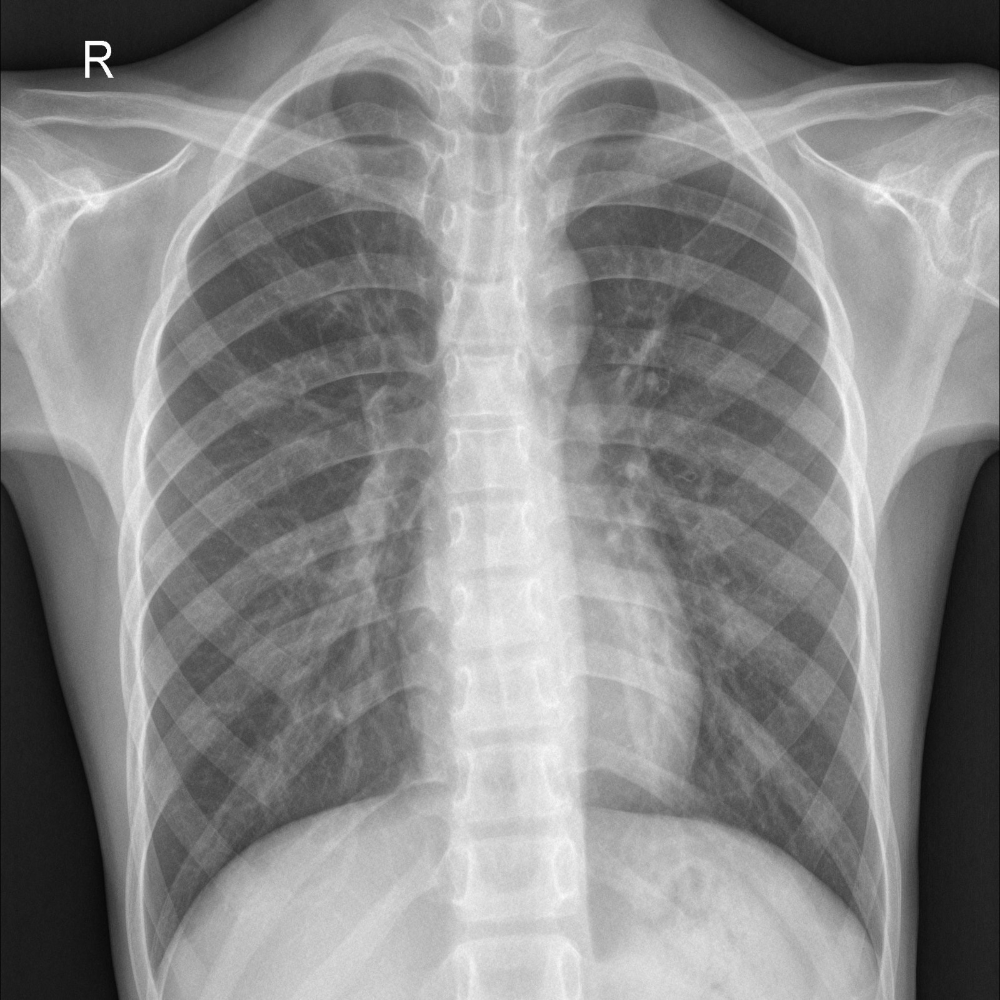

(1000, 1000)


In [ ]:
# import opencv
from google.colab.patches import cv2_imshow
import cv2
 
# Load the input image
image = cv2.imread('/content/WhatsApp Image 2023-04-18 at 1.43.58 PM.jpeg.crdownload')
cv2_imshow(image)
cv2.waitKey(0)

image = cv2.resize(image,(1000,1000))
print(image.shape)
# Use the cvtColor() function to grayscale the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
cv2_imshow(gray_image)
print(gray_image.shape)

In [ ]:
gray_image


array([[15, 39, 40, ..., 30, 29, 12],
       [15, 38, 40, ..., 30, 30, 13],
       [16, 38, 39, ..., 29, 29, 12],
       ...,
       [14, 30, 29, ..., 36, 36, 16],
       [11, 30, 27, ..., 36, 34, 15],
       [13, 32, 30, ..., 39, 34, 15]], dtype=uint8)

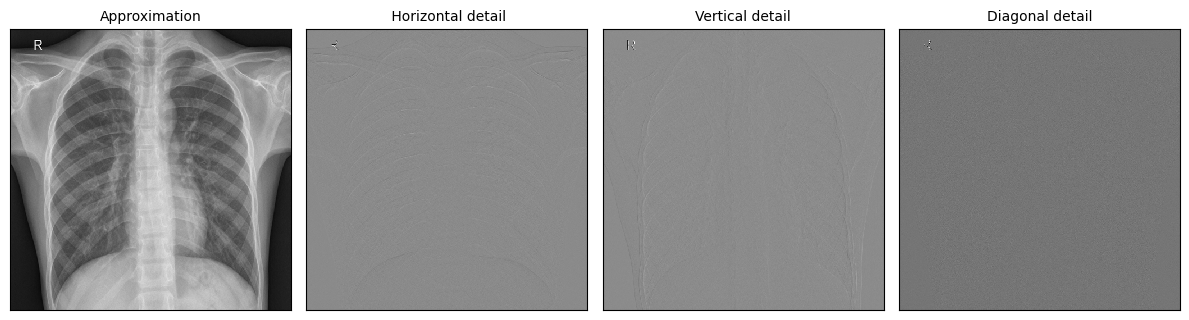

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = gray_image

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 13))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

code to do DWT

In [ ]:
def split(LL, nrows, ncols):

    r, h = LL.shape
    return(LL.reshape(h//nrows, nrows, -1, ncols)
                 .swapaxes(1, 2)
                 .reshape(-1, nrows, ncols))
A,B,C,D=split(LL,251,251)

In [ ]:
from numpy import array
from scipy.linalg import svd
s=0
temp = []
U, s, VT = svd(A)

temp.append(s[0])
U, s, VT = svd(B)
temp.append(s[0])
U, s, VT = svd(C)
temp.append(s[0])
U, s, VT = svd(D)
temp.append(s[0])

SVD


In [ ]:
temp

[69529.99196628903, 70830.25899655338, 69714.24109236631, 76959.00569459262]

In [ ]:
M=[]
for x in range(3):
  if temp[x]>=temp[x+1]:
    M.append(1)
  else:
    M.append(0)  
M

[0, 1, 0]

Binary Image back to string

In [ ]:
from google.colab import files
text = files.upload()

Saving WhatsApp Image 2023-04-18 at 1.33.58 PM.jpeg.crdownload to WhatsApp Image 2023-04-18 at 1.33.58 PM.jpeg (2).crdownload


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/WhatsApp Image 2023-04-18 at 1.33.58 PM.jpeg.crdownload')

In [ ]:
import cv2
import numpy as np


# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Convert to binary
binary = np.where(thresh == 255, 1, 0)

In [ ]:
binarylist=binary.tolist()


In [ ]:
import array
D=[]
for k in binarylist:
  a=[]
  a = array.array('i', k)
  for j in a:
    D.append(j)



In [ ]:
H=''
for i in range(10):
  H= H+ chr(D[i]+48)

In [ ]:
H

'0110111000'

In [ ]:
length = int(H, 2)

In [ ]:
length

440

In [ ]:
N=[]
for i in range(length):
  N.append(D[i+10])

In [ ]:
H=[]
for i in range(len(N)):
  if N[i]==M[i%3]:
    H.append(0)
  else:
    H.append(1)  

In [ ]:
string=''
for i in range(len(H)):
  string+= chr(H[i]+48)

In [ ]:
text1=''
for i in range(0, len(string), 8):
    byte = string[i:i+8]
    char = chr(int(byte, 2))
    text1 += char

In [ ]:
text1

'Hyder Rasak\nkenas varghese\nnavya george\nneena mary alex'

In [ ]:
from google.colab import files
text = files.upload()

Saving output.txt to output (1).txt


In [ ]:
with open('/content/outputtext', 'w') as f:
    f.write(text1)
